# Author : ABHIJEET MAHAJAN

# GRIP AUGUST 2021 @SPARKSFOUNDATION

## Technical Task 1 : Prediction using Supervised ML (Level-Beginner)

In this task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is simple linear regression task as it involves just two variable.

The steps demonstrated in this notebook are:

 1. Loading the data
 2. Familiarizing with data
 3. Visualizing the data
 4. Splitting the data
 5. Model Building & Training
 6. Conclusion

## 1. Loading Data:

   The dataset is borrowed from http://bit.ly/w-data . The overview of this dataset is, it has 25 samples with 2 features. Download the dataset from the link provided.

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Loading data into dataframe

data = pd.read_csv('student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## 2. Familiarizing with Data:
In this step, few dataframe methods are used to look into the data and its features.

In [ ]:
#Shape of dataframe
data.shape

(25, 2)

In [ ]:
#Listing the features of the dataset

data.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
#checking number of null value

data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
# describtion of dataset

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#correlation betwwn data

data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

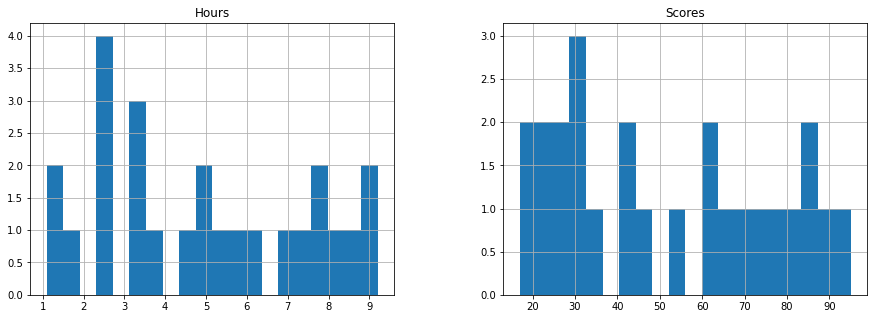

In [ ]:
#Histogram for data visualization

data.hist(bins = 20,figsize = (15,5));

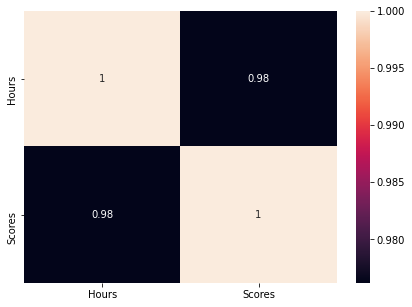

In [ ]:
#Correlation heatmap

plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

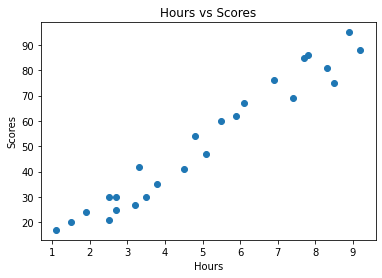

In [ ]:
#scatter plot for visualization

plt.scatter(data["Hours"],data["Scores"])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores");

In [ ]:
#spliting input and output 

y=data["Scores"]
X=data.drop("Scores",axis=1)

## 4. Splitting the Data:
The data is split into train & test sets, 80-20 split.

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((20, 1), (5, 1))

## 5. Model Building & Training:
   Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

   There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of suicide rate is a continuous number, or a floating-point number in programming terms. The supervised machine learning models (regression) considered to train the dataset in this notebook is **Linear Regression**
              
  The metrics considered to evaluate the model performance are Accuracy & Root Mean Squared Error.

In [ ]:
# Linear regression model 
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()

# fit the model 
lr.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

In [ ]:
#importing required libraries 
from sklearn.metrics import mean_squared_error

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.952
Linear Regression: Accuracy on test Data: 0.945

Linear Regression: The RMSE of the training set is: 5.558613350226344
Linear Regression: The RMSE of the testing set is: 4.647447612100373


In [ ]:
#checking for actual vs predicted value

dict={"Actual":y_train,"Predicted":y_train_lr}
new_data=pd.DataFrame(dict)
new_data=new_data.reset_index(drop=1)
new_data.head()

,Actual,Predicted
0,35,39.678655
1,24,20.848407
2,86,79.321281
3,76,70.401690
4,17,12.919882


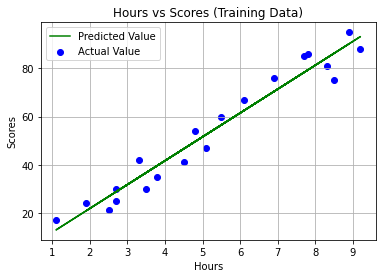

In [ ]:
plt.scatter(X_train,y_train,label="Actual Value",color="blue")
plt.plot(X_train,y_train_lr,label="Predicted Value",color="green")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores (Training Data)")
plt.grid(True)
plt.legend();

In [ ]:
#checking for actual vs predicted value

dict={"Actual":y_test,"Predicted":y_test_lr}
new_data=pd.DataFrame(dict)
new_data=new_data.reset_index(drop=1)
new_data.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


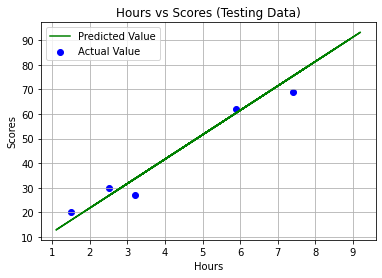

In [ ]:
plt.scatter(X_test,y_test,label="Actual Value",color="blue")
plt.plot(X_train,y_train_lr,label="Predicted Value",color="green")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores (Testing Data)")
plt.grid(True)
plt.legend();

In [ ]:
#predicted score if a student studies for 9.25 hrs/ day

result=lr.predict([[9.25]])
print("The Predicted score of student comes to be {:.3f} if a student studies for 9.25 hrs/ day.".format(result[0]))

The Predicted score of student comes to be 93.692 if a student studies for 9.25 hrs/ day.


## 6. Conclusion:
  The final take away form this project is the working of Linear Regression model on a dataset and understanding their parameters. Creating this notebook helped me to learn a lot about the parameters of the models. Accuracy of model comes to be 94.5% and the Predicted score of student comes to be 93.692 if a student studies for 9.25 hrs/ day.